In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline 

In [6]:
iris = load_iris() # 鸢(yuan)尾花数据集
df = pd.DataFrame(iris.data,columns=iris.feature_names) # 花萼长、花儿宽、花瓣长、花瓣宽
df['label'] = iris.target # 插入label列
df.label.value_counts() #呈现label值的分布
df.columns = ['sepal length','sepal width','petal length','petal width','label'] # 重命名colums

(Text(0.5, 0, 'sepal length'), Text(0, 0.5, 'sepal width'))

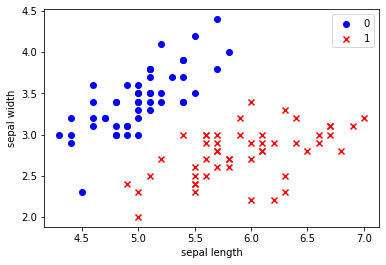

In [7]:
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='b',marker='o',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='r',marker='x',label='1')
plt.legend()
plt.xlabel('sepal length'),plt.ylabel('sepal width')

In [8]:
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
y = [1 if i == 0 else -1 for i in y] # 将label{0,1}改为{-1,1}

## Perceptron

In [11]:
class Model:
    def __init__(self):
        self.w = np.ones(len(X[0]),dtype=np.float32) # w的维度和特征X的数量一致
        self.b = 0 # b∈ R
        self.learning_rate = 0.1
        self.fit_num = 0 # 记录训练集被完整训练次数
    
    def sign(self,x,w,b):
        y = np.dot(x,w) + b
        return y

    # 随机梯度下降法
    def fit(self,X_train,y_train):
        # is_wrong 变量妙：当更改w和b之后，继续会验证后面的数据集，但未验证此前的数据集
        # 所以用变量is_wrong控制，若wrong_count不为0(也即又有更新时),iswrong为false
        # 那么将继续从头开始验证数据集，直至所有数据集都被分开
        is_wrong = False 
        while not is_wrong: 
            self.fit_num += 1
            wrong_count = 0
            for i in range(len(X_train)): # 从头到尾遍历训练集X
                Xi = X_train[i]
                yi = y_train[i]
                # 随机梯度下降在此是按序挑选分类点
                if yi * self.sign(Xi, self.w, self.b) <= 0: # 从头到尾找到不满足所有当前模型下的误分类点
                    self.w = self.w + self.learning_rate * np.dot(yi,Xi)
                    self.b = self.b + self.learning_rate * yi
                    wrong_count += 1 # 误分个数
            if wrong_count == 0: # 只有当本轮数据集验证时没有被误分的样本时，才会将iswrong设为true
                is_wrong = True
        return 'Perceptron Model!'                
    


In [12]:
perceptron = Model()
perceptron.fit(X,y)

'Perceptron Model!'

In [ ]:
print(f'数据集被完整训练了{perceptron.fit_num}次')

数据集被完整训练了705次


In [13]:
print(perceptron.w,perceptron.b)

[-7.95 10.12] 12.499999999999972


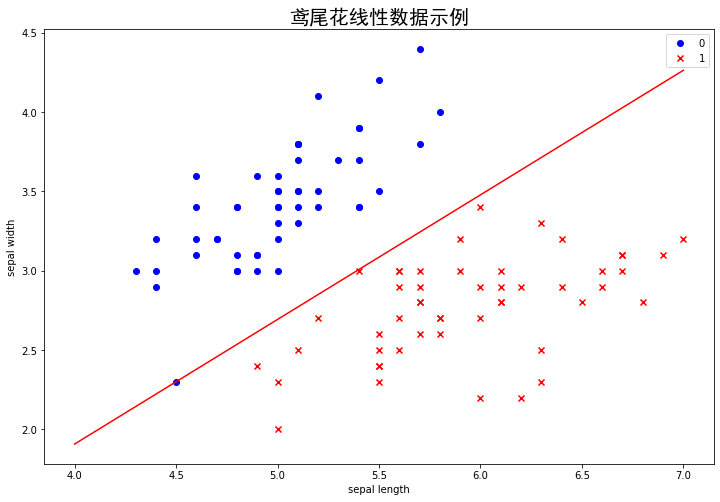

In [30]:
# 绘制决策边界（分离超平面）
plt.figure(figsize=(12,8))
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='b',marker='o',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='r',marker='x',label='1')
plt.xlabel('sepal length'),plt.ylabel('sepal width')
plt.title('鸢尾花线性数据示例',fontproperties='SimHei',fontsize=20)
plt.legend()
# 分离超平面为 wx+b=0
x1 = np.linspace(4,7,100)
x2 = -(perceptron.b + perceptron.w[0] * x1) / perceptron.w[1]
plt.plot(x1,x2,'r')

## scikit-learn 方法

In [20]:
import sklearn
from sklearn.linear_model import Perceptron

In [49]:
clf = Perceptron(fit_intercept=True,max_iter=1000,shuffle=True,tol=None)
"""
:param fit_intercept:是否对截距b进行估计
:param max_iter:最大迭代次数，哪怕损失函数依旧大于0
:param shuffle:每轮训练后是否打乱数据
:param tol:迭代停止的标准。如果不为None，那么当前迭代造成的损失函数很小时便会停止下降
"""
clf.fit(X,y)

Perceptron(tol=None)

In [50]:
print(clf.coef_)
print(clf.intercept_)
print(type(clf.intercept_))

[[-70.7  87.9]]
[117.]
<class 'numpy.ndarray'>


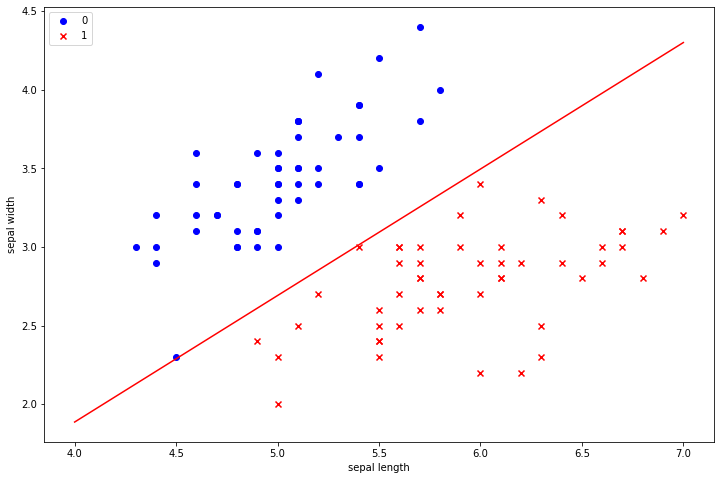

In [51]:
# 绘制决策边界（分离超平面）
plt.figure(figsize=(12,8))
plt.scatter(df[:50]['sepal length'],df[:50]['sepal width'],c='b',marker='o',label='0')
plt.scatter(df[50:100]['sepal length'],df[50:100]['sepal width'],c='r',marker='x',label='1')
plt.xlabel('sepal length'),plt.ylabel('sepal width')
plt.legend()
# 分离超平面为 wx+b=0
x1 = np.linspace(4,7,100)
x2 = -(clf.intercept_[0] + clf.coef_[0][0] * x1) / clf.coef_[0][1]
plt.plot(x1,x2,'r')